# Explore Data Analysis

## Import modules

In [ ]:
! pip install kaggle
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **OHLC Data**

In [ ]:
! kaggle datasets download landiepnguyen/contract-trading-ethusdt-jan2024 -f openhighclose_ETHUSDT_7d.csv

Dataset URL: https://www.kaggle.com/datasets/landiepnguyen/contract-trading-ethusdt-jan2024
License(s): unknown
  0% 0.00/581k [00:00<?, ?B/s]
100% 581k/581k [00:00<00:00, 112MB/s]


In [ ]:
df_ohc = pd.read_csv('/content/openhighclose_ETHUSDT_7d.csv')
df_ohc['start_at'] = pd.to_datetime(df_ohc['start_at'], unit='s')

In [ ]:
df_ohc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   start_at  11520 non-null  datetime64[ns]
 1   symbol    11520 non-null  object        
 2   period    11520 non-null  int64         
 3   open      11520 non-null  float64       
 4   high      11520 non-null  float64       
 5   low       11520 non-null  float64       
 6   close     11520 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 630.1+ KB


In [ ]:
df_ohc.set_index('start_at', inplace= True)
df_ohc.head()

,symbol,period,open,high,low,close
start_at,,,,,,
2024-01-01 00:00:00,ETHUSD,1,2281.49,2282.48,2280.88,2281.45
2024-01-01 00:01:00,ETHUSD,1,2281.45,2283.51,2281.43,2283.37
2024-01-01 00:02:00,ETHUSD,1,2283.37,2284.21,2283.08,2284.02
2024-01-01 00:03:00,ETHUSD,1,2284.02,2285.88,2284.01,2285.85
2024-01-01 00:04:00,ETHUSD,1,2285.85,2287.39,2285.65,2287.29


**Biểu đồ đường thể hiện xu hướng giá**

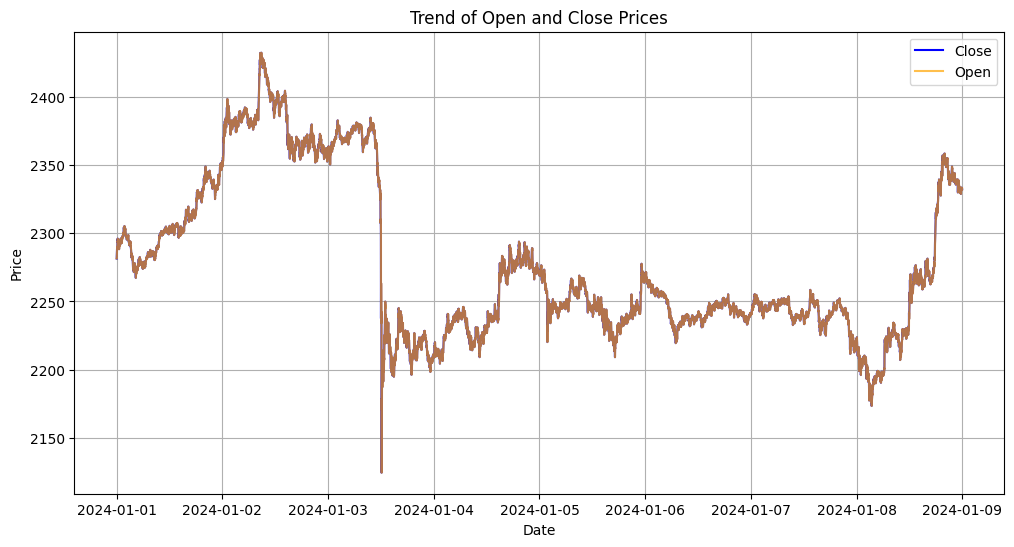

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_ohc['close'], label='Close', color='blue')
plt.plot(df_ohc['open'], label='Open', color='orange', alpha=0.7)
plt.title('Trend of Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

**Nhận xét**: giá mở cửa và giá đóng cửa có sự biến động tương đối ổn định. Tuy nhiên, có lúc giá đóng cửa cao hơn giá mở cửa, và ngược lại, thể hiện xu hướng thay đổi theo thời gian.

**Phân phối giá Close**

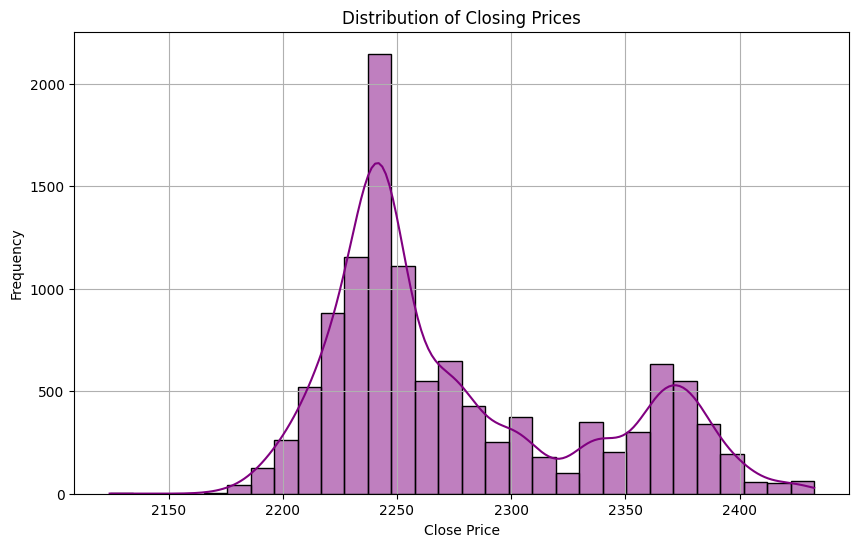

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_ohc['close'], kde=True, bins=30, color='purple')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Ma trận tương quan**

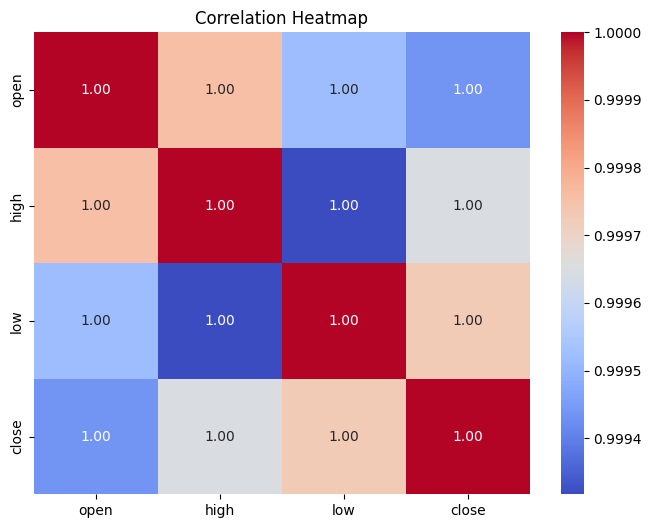

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_ohc[['open', 'high', 'low', 'close']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Nhận xét**: Tất cả các biến có hệ số tương quan rất cao (gần 1.00) với nhau, điều này cho thấy các giá trị open, high, low, và close có mối liên hệ chặt chẽ. Hệ số tương quan gần 1.00 cho thấy rằng khi giá mở cửa (open) thay đổi, giá cao nhất (high) và giá đóng cửa (close) cũng sẽ thay đổi theo chiều hướng tương tự.

**Trực quan đường Moving Average**

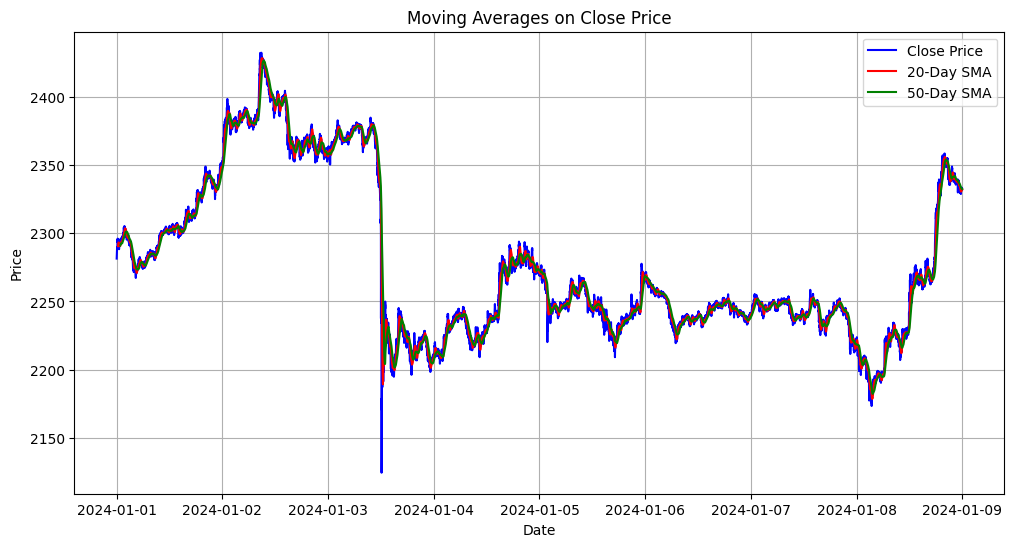

In [ ]:
df_ohc['SMA_20'] = df_ohc['close'].rolling(window=20).mean()
df_ohc['SMA_50'] = df_ohc['close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(df_ohc['close'], label = 'Close Price', color = 'blue')
plt.plot(df_ohc['SMA_20'], label = '20-Day SMA', color='red')
plt.plot(df_ohc['SMA_50'], label = '50-Day SMA', color='green')
plt.title('Moving Averages on Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

**Nhận xét**:
- 20-Day SMA (đường đỏ) phản ứng nhanh với biến động ngắn hạn, giúp phát hiện xu hướng thay đổi sớm.
- 50-Day SMA (đường xanh lá cây) mượt mà hơn, cho thấy xu hướng dài hạn, và cung cấp các tín hiệu giao dịch rõ ràng.
- Cơ Hội Giao Dịch: Các điểm cắt nhau giữa đường SMA có thể được sử dụng để tạo ra các tín hiệu mua bán, giúp nhà đầu tư đưa ra quyết định chiến lược.

## **Order Book Data**

In [ ]:
! kaggle datasets download landiepnguyen/contract-trading-ethusdt-jan2024 -f orderbook_ETHUSDT_7d.csv

Dataset URL: https://www.kaggle.com/datasets/landiepnguyen/contract-trading-ethusdt-jan2024
License(s): unknown
 98% 796M/815M [00:10<00:00, 169MB/s]
100% 815M/815M [00:10<00:00, 78.0MB/s]


In [ ]:
df = pd.read_csv('/content/orderbook_ETHUSDT_7d.csv', index_col=False)

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)
df.head()

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,bid_price_3,bid_size_3,ask_price_4,ask_size_4,bid_price_4,bid_size_4,ask_price_5,ask_size_5,bid_price_5,bid_size_5
timestamp,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00.631,2283.88,2.38,2283.87,29.44,2283.89,0.1,2283.86,2.1,2283.92,0.34,2283.84,13.08,2283.93,29.08,2283.83,3.6,2284.04,4.38,2283.8,2.31
2024-01-01 00:00:00.729,2283.88,2.38,2283.87,22.94,2283.89,0.1,2283.86,2.1,2283.92,0.34,2283.84,13.08,2283.93,29.08,2283.83,3.6,2284.04,4.38,2283.8,2.31
2024-01-01 00:00:00.829,2283.88,2.38,2283.87,22.94,2283.89,0.1,2283.86,2.1,2283.92,0.34,2283.84,13.08,2283.93,29.08,2283.83,3.6,2284.04,4.38,2283.8,2.31
2024-01-01 00:00:00.929,2283.88,2.38,2283.87,22.94,2283.89,0.1,2283.86,2.1,2283.92,0.34,2283.84,13.08,2283.93,29.08,2283.83,3.6,2284.04,4.38,2283.8,2.31
2024-01-01 00:00:01.029,2283.88,2.38,2283.87,29.44,2283.89,0.1,2283.86,2.1,2283.92,0.34,2283.84,13.08,2283.93,29.08,2283.83,3.6,2284.04,4.38,2283.8,2.31


**1. Biểu đồ giá bid/ask theo thời gian**

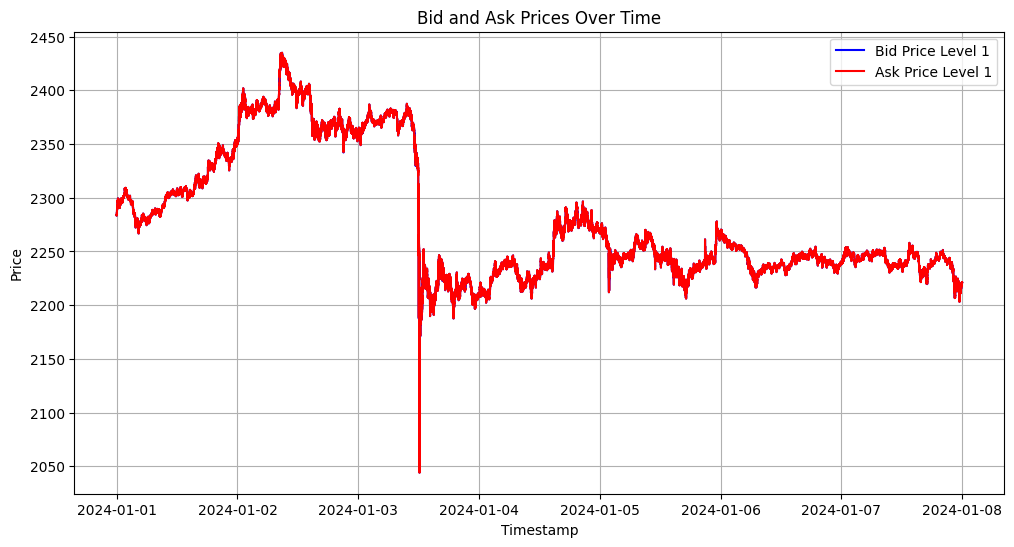

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bid_price_1'], label='Bid Price Level 1', color='blue')
plt.plot(df.index, df['ask_price_1'], label='Ask Price Level 1', color='red')
plt.title('Bid and Ask Prices Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

**2. Spread giữa giá bid và ask**

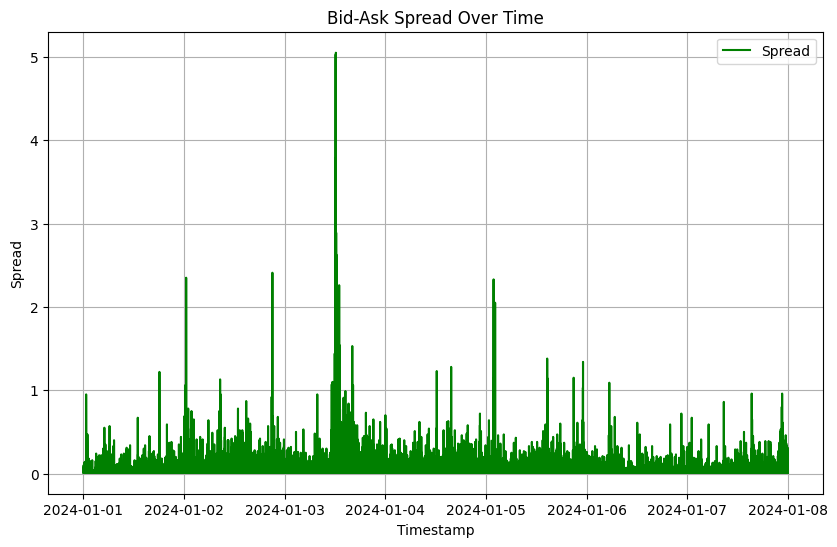

In [ ]:
df['spread'] = df['ask_price_1'] - df['bid_price_1']

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['spread'], label='Spread', color='green')
plt.title('Bid-Ask Spread Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Spread')
plt.grid()
plt.legend()
plt.show()

**3. Histogram cho thấy phân phối giá Bid/Ask**

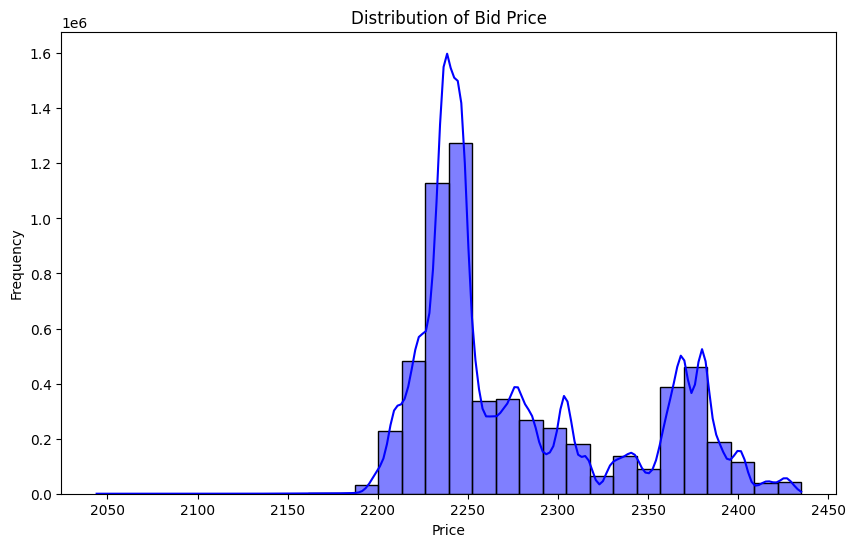

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bid_price_1'], bins=30, kde=True, color='blue', label='Bid Price')
plt.title('Distribution of Bid Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

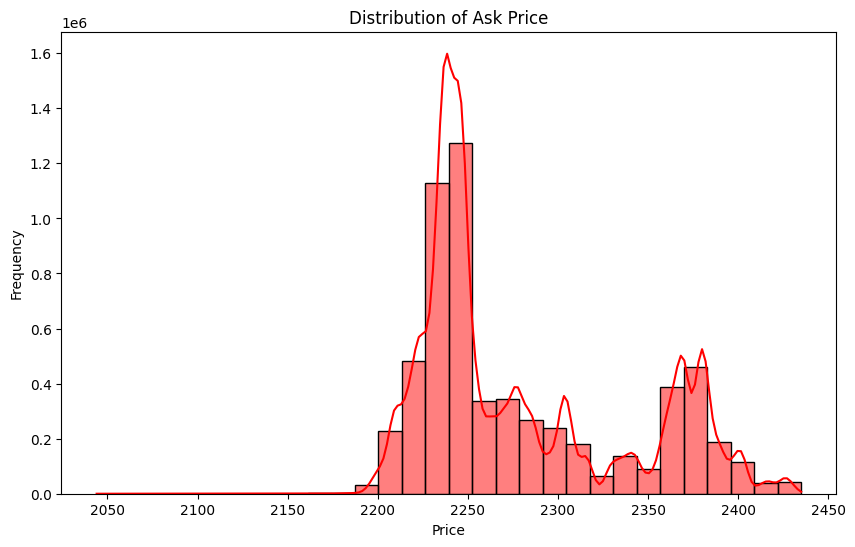

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ask_price_1'], bins=30, kde=True, color='red', label='Ask Price')
plt.title('Distribution of Ask Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()